## House Price Prediction
* I have to create a model which can predict the price of house based on various feature of residential properties.
* To build a predictive model that accurately estimates the sale price of residential properties, using features such as location, lot size, house style, quality, year built, and more.

In [1]:
import pandas as pd                         # import pandas for analyzing, cleaning, manipulating and exploring data
import numpy as np                          # import numpy for working with mathematical data/ numerical data
import seaborn as sns                       # import seaborn for vizualing data and plotting statistical graph
import matplotlib.pyplot as plt             # import matplotlib for vizualising data and plotting statistical graph
import warnings                             # control the display of warning messages during execution
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("data.csv")             #Load data and store it in 'df' variable 
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
df.shape           #size of dataset

(1460, 81)

In [4]:
print(type(df))       #type of data is Dataframe 

<class 'pandas.core.frame.DataFrame'>


## Basic Checks:
* Basic data checks help assess the dataset's structure and quality before modeling. Key steps include checking shape, column names, and data types to understand the features. Identifying missing values and duplicates ensures data integrity.
*  Summary statistics reveal data distribution and outliers, while examining categorical features guides encoding. Analyzing the target variable's distribution and feature correlations highlights important relationships.
*  These checks ensure the dataset is clean, well-understood, and ready for effective machine learning or analysis.

## Attribute Information:-

* SalePrice sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [9]:
df.describe()          # it will give statistical information

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [10]:
df.describe(include='O')    #statistical information of categorical data

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [11]:
df.info()             #information of each and every columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Feature Engineering 

In [16]:
df.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [18]:
df.drop('Id', axis= 1, inplace= True)    #drop column 'Id' which is not giving any information

In [20]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns    # only columns having int and float
categorical_cols = df.select_dtypes(include=['object']).columns            # only columns having categorical value

## EDA

#### 1. Univariant


##### Numerical Columns


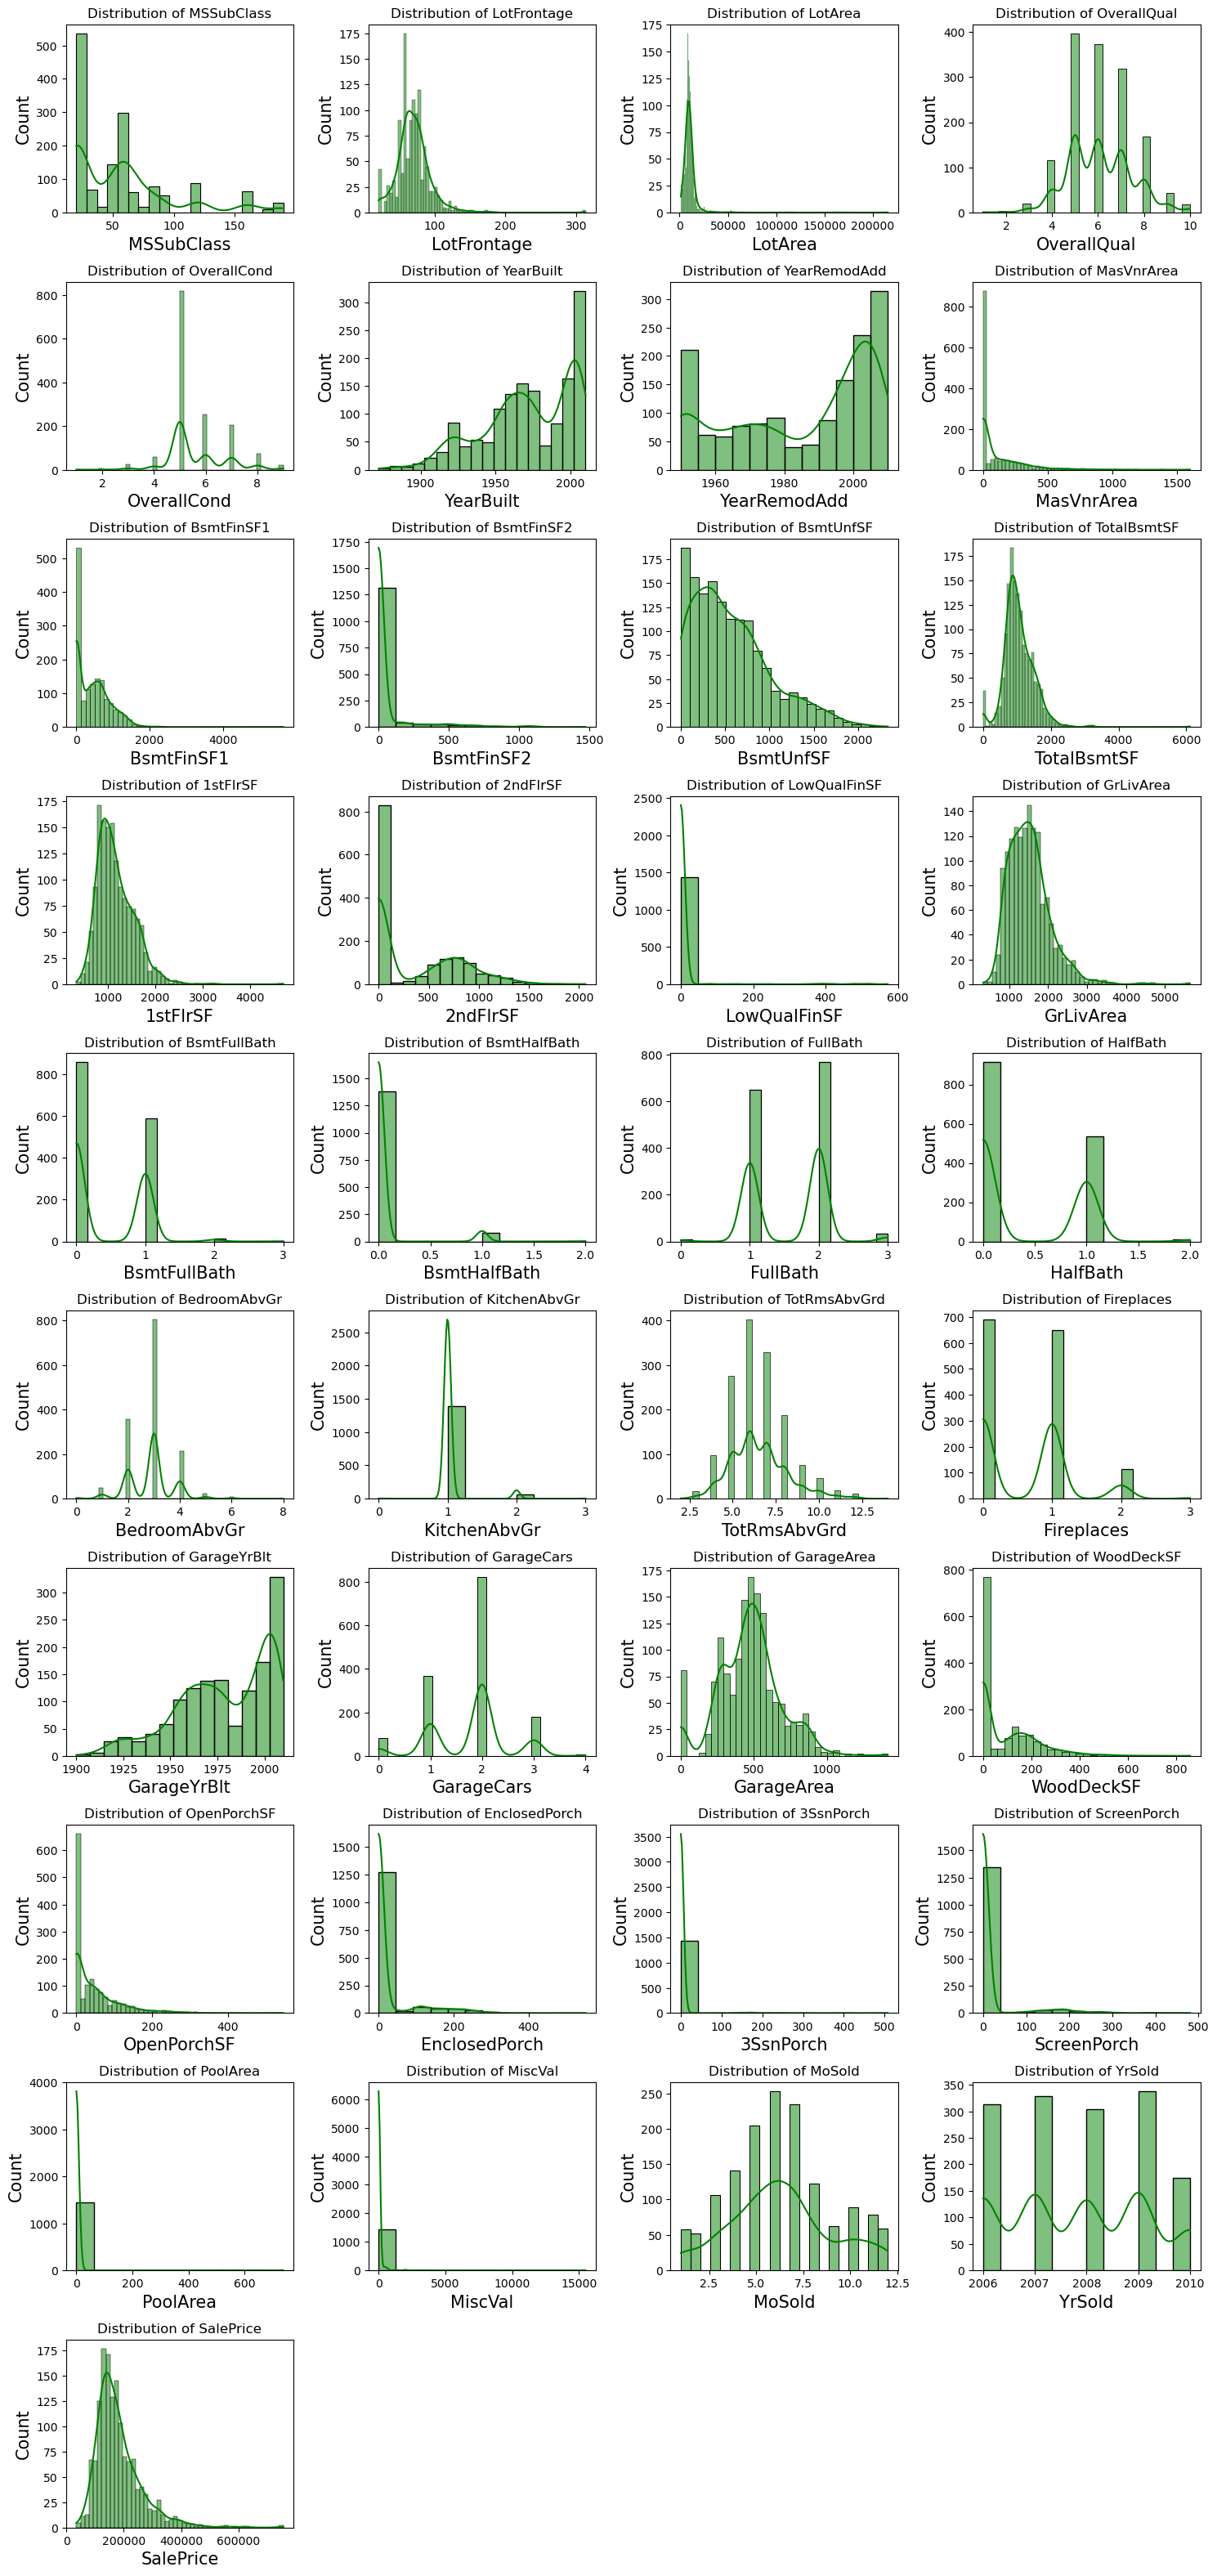

In [18]:
plot = 1 
plt.figure(figsize=(15,50))
for i in numerical_cols:
    if plot <= 60:
        plt.subplot(16,4, plot)
        sns.histplot(df[i], kde= True, color= 'green')
        plt.xlabel(i, fontsize = 15)
        plt.ylabel("Count", fontsize = 15)
        plt.title(f"Distribution of {i}")
        plot = plot + 1
plt.tight_layout()
plt.show()

### Insights:
* Most physical dimensions like **LotArea, GrLivArea, and TotalBsmtSF** are **right-skewed**, indicating that while most homes are moderately sized, a few are significantly larger.
* **Discrete variables** such as **FullBath, BedroomAbvGr, and Fireplaces** show expected **clustering** around common residential values.
* Features like **3SsnPorch, PoolArea, and MiscVal** are mostly **zero**, suggesting rare property traits.
*  Temporal variables like **YearBuilt, GarageYrBlt** show a **higher frequency** of more recent years.
*  The target variable, **SalePrice**, is slightly **right-skewed** with a few high-value outliers.

##### Categorical columns 

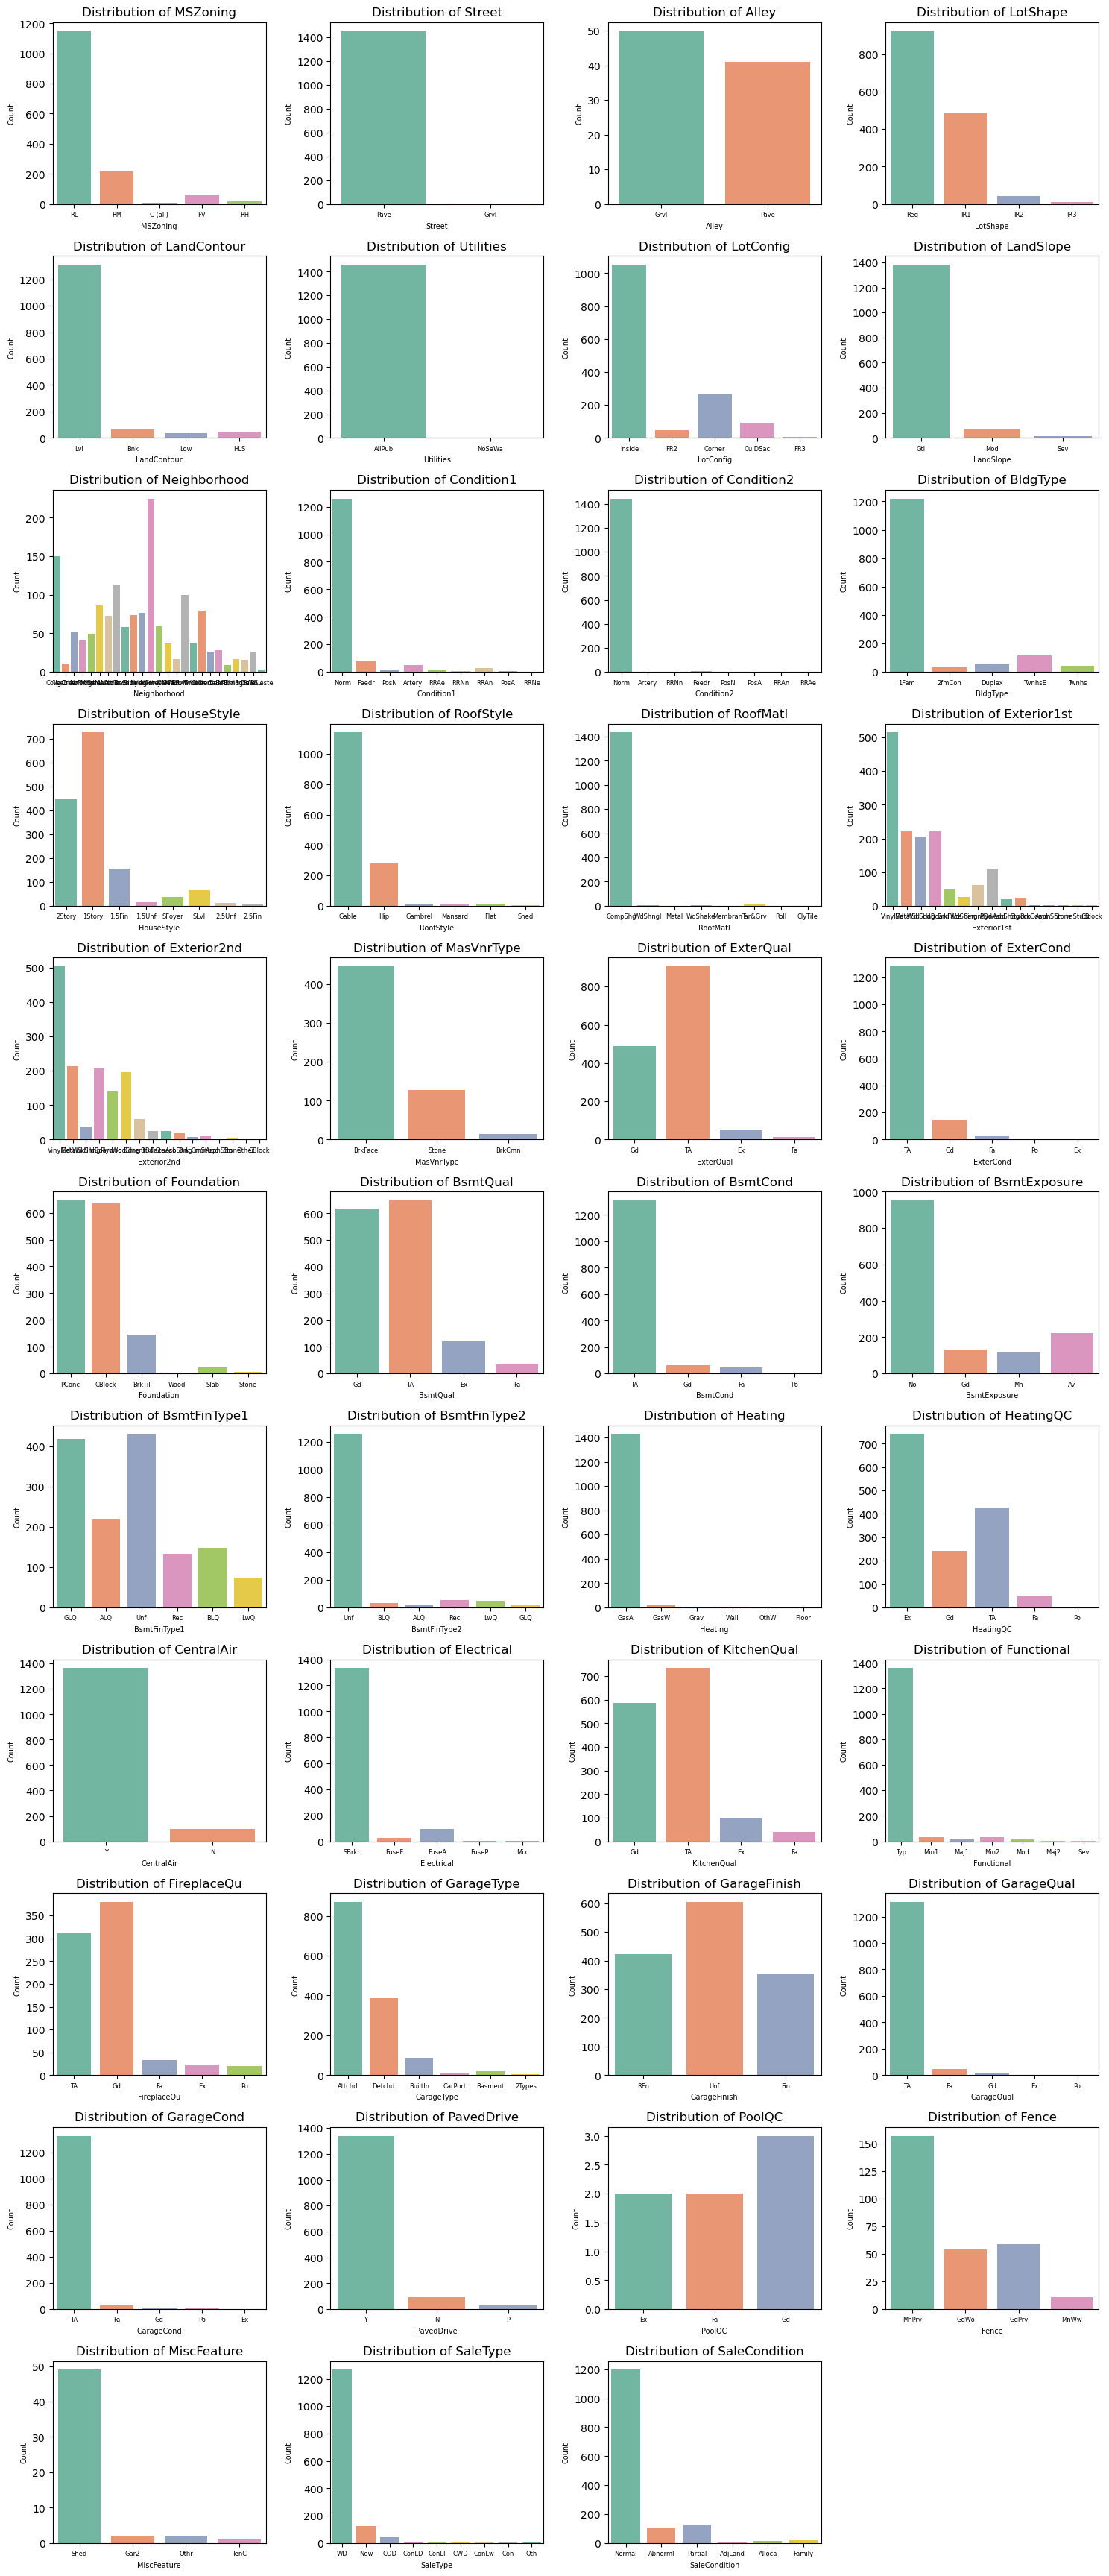

In [21]:
plot = 1                                                           #  Intialization
plt.figure(figsize=(15,50))                                        # Create a figure having width = 15, and height = 50
for i in categorical_cols:
    if plot <= 81:
        
        plt.subplot(16,4,plot)                                    # subplot grid of 15 rows and 3 columns 
        sns.countplot(data = df, x = i, palette= 'Set2' )
        plt.xlabel(i, fontsize = 7)                              # Set x-axis as column name 
        plt.ylabel("Count", fontsize= 7)                        # set y-axis as count
        plt.xticks(fontsize = 6)
        plt.title(f"Distribution of {i}")
        plot = plot + 1 
plt.tight_layout()
plt.show()

### Insights: 
* **SaleCondition, Neighborhood, and HouseStyle**, show a **few dominant categories**, indicating certain house types or areas are more common.
* Features like **ExterQual and KitchenQual** are skewed toward **higher quality ratings**, reflecting overall good housing conditions.
* Some features like **PoolQC, Alley, or Fence** may have a high proportion of **missing or "None" values**.

#### 2. Bivariant 

* For numeric v/s numeric data use **Scatter plot**
* For Numeric v/s categorical data use **Barplot**

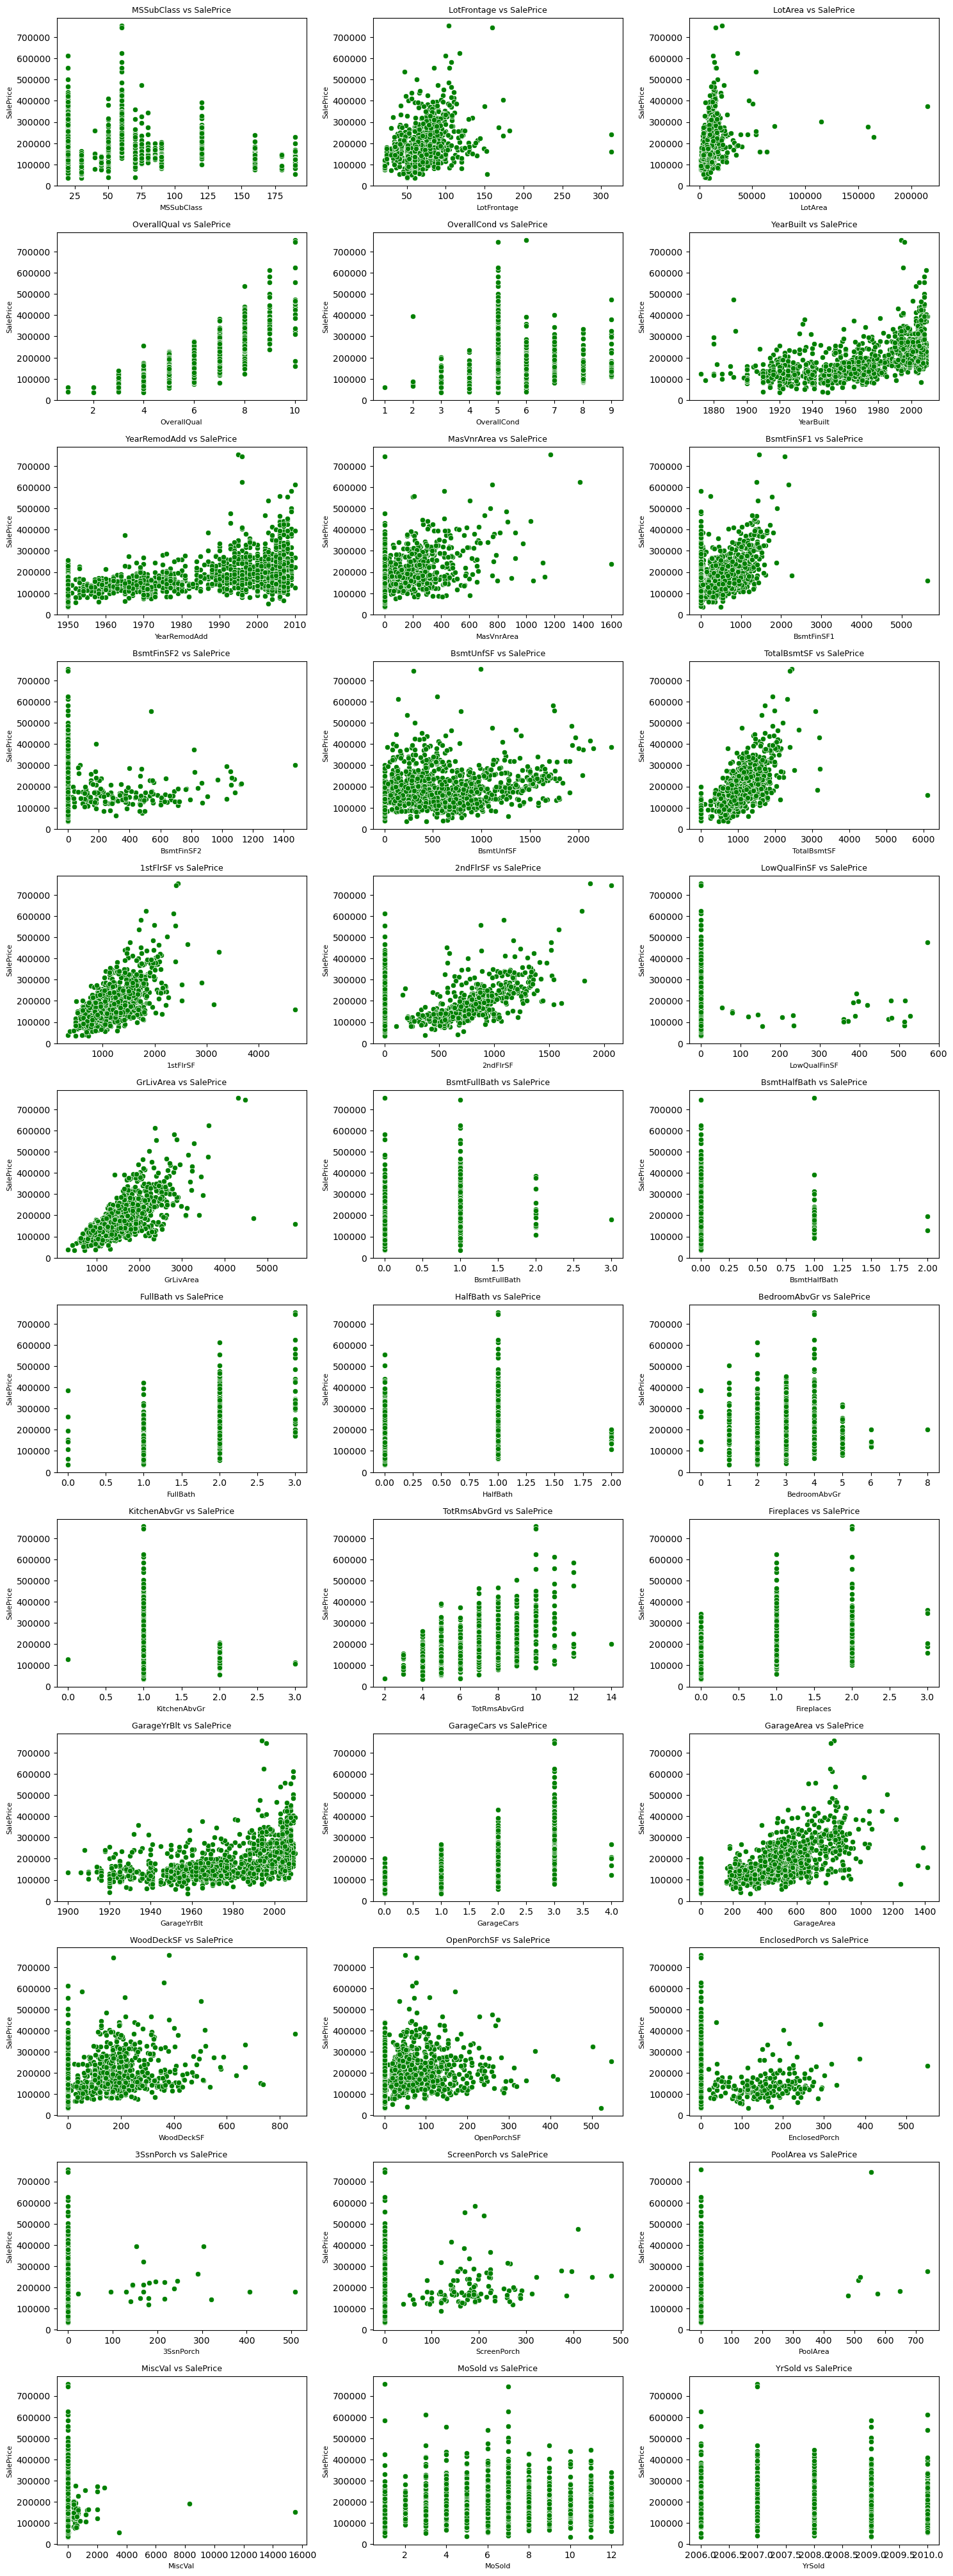

In [30]:
target ='SalePrice'
plt.figure(figsize= (15, 50))                          # Create a figure having width = 15, and height = 50
plot = 1                                               #  Intialization

for col in numerical_cols:
    if col != target and plot <=50:
        
        plt.subplot(15,3, plot)                       # subplot grid of 15 rows and 3 columns 
        sns.scatterplot(x=df[col], y=df[target], color='green')
        plt.title(f'{col} vs {target}', fontsize = 9)
        plt.xlabel(col, fontsize = 8)                 # Set x-axis as column name 
        plt.ylabel(target, fontsize = 8)              # Set y-axis as count
        plot = plot + 1
plt.tight_layout()
plt.show()

### Insights : 
*  **Strong positive linear relationships** are observed with features like **GrLivArea, TotalBsmtSF, 1stFlrSF, and GarageArea** suggesting they significantly influence housing prices.
*   Features such as **LotArea and MasVnrArea** show **high variance and outliers**.
*   Some variables like **LowQualFinSF, BsmtFinSF2** have **limited influence**.

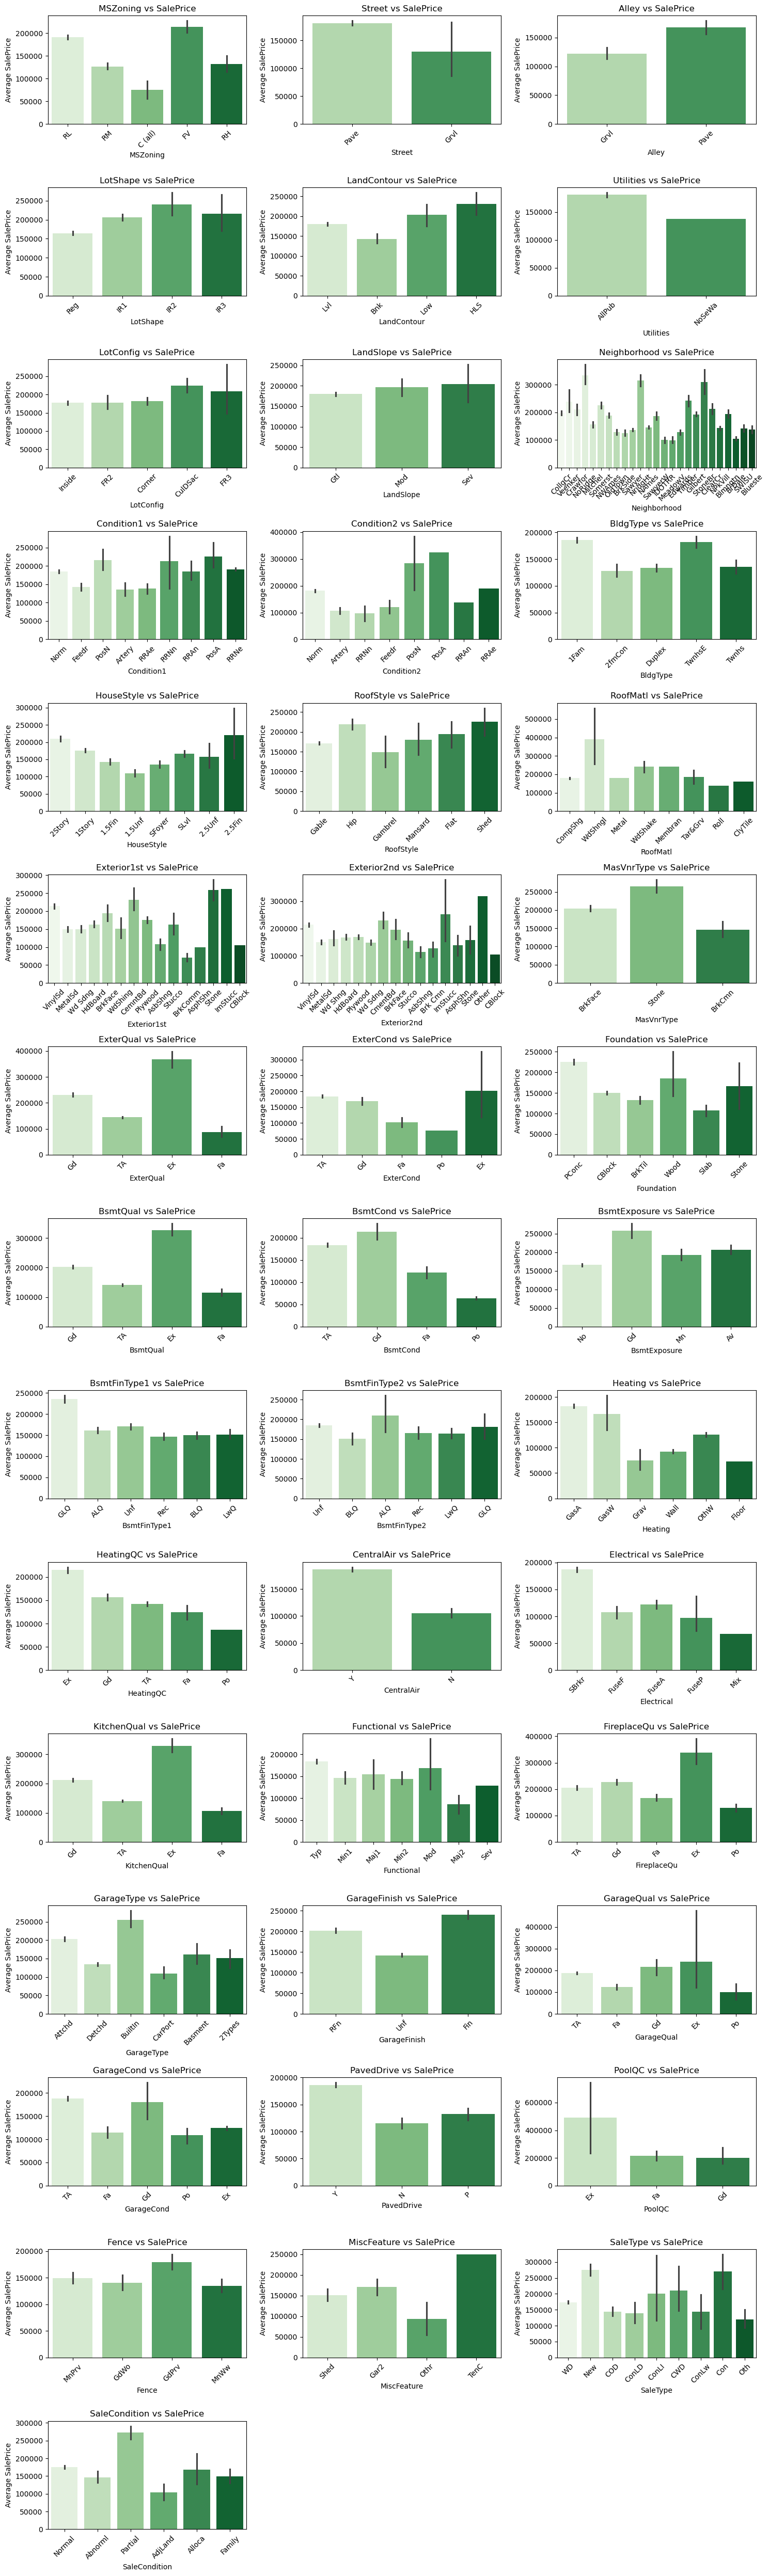

In [37]:
target = 'SalePrice'                        # give 'SalePrice' as target
plt.figure(figsize=(15,50))                 # Create a figure having width = 15, and height = 50
plot = 1                                    #  Intialization

for col in categorical_cols:
    if plot <= 50:
        plt.subplot(15,3,plot )            # subplot grid of 15 rows and 3 columns 
    
        sns.barplot(x = col, y= target, data= df, palette= 'Greens')
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)                   # Set x-axis as column name
        plt.ylabel(f'Average {target}')   # Set y-axis as 'target'
        plt.xticks(rotation = 45)
        plot = plot + 1
plt.tight_layout()
plt.show()

### Insights :
*  Features such as **Neighborhood, Exterior1st, and KitchenQual** indicated **strong predictive power**.
*  Features like **ExterQual and KitchenQual** are associated with significantly **higher prices**.
*   Variables like **HouseStyle and BldgType** also display clear **price trends**.
*   Some features show minimal variation, suggesting limited impact.

## Feature Engineering 

###   Data Preprocessing

#### 1. check Duplicate Values 

In [23]:
duplicate_values = df.duplicated().sum()    #check for duplicate values or rows
duplicate_values

0

#### 2. Handling Missing Values 


In [26]:
miss_values = df.isnull().sum()                      # to see null values 
miss_values_percent = (miss_values / len(df)) * 100  # percentage of missing values

#Create Dataframe 
miss_values_data = pd.DataFrame({
    "Missing Values" : miss_values,
    "Percentage" : miss_values_percent
})

print(miss_values_data.sort_values(by= 'Missing Values', ascending= False).head(20))   # top 20 columns with most missing value

miss_values_data[miss_values_data["Missing Values"] > 0].sort_values(by= 'Percentage', ascending=False)  # Display columns that have many missing data

              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageYrBlt               81    5.547945
GarageCond                81    5.547945
GarageType                81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493
MSSubClass                 0    0.000000


Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtFinType2              38    2.602740
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493

* Drop columns where **>50%** of data is missing.
* There ar **5** columns having **prct > 50%**
* For **Numerical columns** use **MEDIAN**.
* For **Categorical columns** use **MODE**

In [29]:
cols_to_drop = miss_values_data[miss_values_data["Percentage"] > 50].index  # store thos e columns having missing values > 50%

In [31]:
df = df.drop(columns= cols_to_drop)   # drop those columns 

In [33]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 75 columns]

In [34]:
for i in numerical_cols:
    df[i].fillna(df[i].median(), inplace = True)   # replace missing values in numerical columns with median

In [35]:
for i in categorical_cols:
    if i in df.columns and df[i].isnull().sum() > 0:
        df[i].fillna(df[i].mode()[0], inplace= True)    # replace missing values in categorical columns with mode

In [36]:
df.isnull().sum().sort_values(ascending = False).head(20)   #Shows top 20 col with missing values

MSSubClass      0
GarageYrBlt     0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageType      0
GarageFinish    0
CentralAir      0
dtype: int64

#### 3. Fix Data Types 


In [39]:
print("Data Types of first 20 columns: ") 
print(df.dtypes.head(20))           # shows first 20 column's data types

Data Types of first 20 columns: 
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
dtype: object


In [40]:
# convert object to category

categorical_cols = df.select_dtypes(include='object').columns
for i in categorical_cols:
    df[i] = df[i].astype('category')       # convert dtype: 'object' to 'category'

In [41]:
print(df.dtypes.head(20))

MSSubClass         int64
MSZoning        category
LotFrontage      float64
LotArea            int64
Street          category
LotShape        category
LandContour     category
Utilities       category
LotConfig       category
LandSlope       category
Neighborhood    category
Condition1      category
Condition2      category
BldgType        category
HouseStyle      category
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle       category
dtype: object


#### 4. Remove columns showing less variance


In [45]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("_______________________________")


MSSubClass
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
_______________________________
MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
_______________________________
LotFrontage
LotFrontage
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
_______________________________
LotArea
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64
_______________________________
Street
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
_______________________________
LotShape
LotShape
Reg    925
IR1    484
IR2

In [46]:
# Store those cols which shows very less variance
unnecessary_cols = ['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']

In [48]:
df .head(3)                                            

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  

[3 rows x 75 columns]

#### 5. Encoding  
* It is used to convert Categorical data to numerical data.


In [50]:
from sklearn.preprocessing import LabelEncoder   #import labelEncoder from sklearn.preprocessing module's.
le = LabelEncoder()

In [54]:
# Make sure to use only existing columns
for col in categorical_cols:
    if col in df.columns:  # Check if column exists
        if df[col].nunique() > 1:
            df[col] = le.fit_transform(df[col].astype(str))
    else:
        print(f"Column not found in DataFrame: {col}")

In [55]:
remaining_cols = df.select_dtypes(include=['object', 'category']).columns    #for other columns apply One hot encoding 
df = pd.get_dummies(df, columns= remaining_cols, drop_first= True)

In [56]:
print(df.dtypes.head(20))     # all are in int, float or categorical datatype

MSSubClass        int64
MSZoning          int32
LotFrontage     float64
LotArea           int64
Street            int32
LotShape          int32
LandContour       int32
Utilities         int32
LotConfig         int32
LandSlope         int32
Neighborhood      int32
Condition1        int32
Condition2        int32
BldgType          int32
HouseStyle        int32
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle         int32
dtype: object


* Use OneHotEncoding 

#### 8. Split X and Y 


In [59]:
x = df.drop("SalePrice", axis= 1)  # 'x' represents independent features so we're dropping 'SalePrice'
x.head(3)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   

   Utilities  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0          0          4          0  ...           61              0   
1          0          2          0  ...            0              0   
2          0          4          0  ...           42              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0            0         0        0       2    2008         8   
1          0            0         0        0       5    2007         8   
2          0            0         0        0       9    2008         8   

   SaleCondition  
0              4  
1              4  
2              4  

[3 rows x 74 columns]

In [60]:
y = df.SalePrice   # 'y' represents dependent feature

#### 9. Scaling 


In [62]:
from sklearn.preprocessing import MinMaxScaler   # Importing MinMaxScaler which gives values between (-1 to +1)
scaler = MinMaxScaler()                          # store MinMaxscaler in 'sclare'

In [63]:
x_scaled = scaler.fit_transform(x)              # giving scaled value to dataset

In [65]:
x_scaled

array([[0.23529412, 0.75      , 0.15068493, ..., 0.5       , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.20205479, ..., 0.25      , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.5       , 1.        ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.1609589 , ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.18493151, ..., 0.5       , 1.        ,
        0.8       ]])

In [66]:
df.drop(columns= unnecessary_cols)          # drop this columns having less variance 

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             60         3         65.0     8450       1         3   
1             20         3         80.0     9600       1         3   
2             60         3         68.0    11250       1         0   
3             70         3         60.0     9550       1         0   
4             60         3         84.0    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
1455          60         3         62.0     7917       1         3   
1456          20         3         85.0    13175       1         3   
1457          70         3         66.0     9042       1         3   
1458          20         3         68.0     9717       1         3   
1459          20         3         75.0     9937       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  PavedDrive  \
0               3          0          4          0  ...           2   
1               3          0          2          0  ...           2   
2               3          0          4          0  ...           2   
3               3          0          0          0  ...           2   
4               3          0          2          0  ...           2   
...           ...        ...        ...        ...  ...         ...   
1455            3          0          4          0  ...           2   
1456            3          0          4          0  ...           2   
1457            3          0          4          0  ...           2   
1458            3          0          4          0  ...           2   
1459            3          0          4          0  ...           2   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  \
0              0           61              0            0       2    2008   
1            298            0              0            0       5    2007   
2              0           42              0            0       9    2008   
3              0           35            272            0       2    2006   
4            192           84              0            0      12    2008   
...          ...          ...            ...          ...     ...     ...   
1455           0           40              0            0       8    2007   
1456         349            0              0            0       2    2010   
1457           0           60              0            0       5    2010   
1458         366            0            112            0       4    2010   
1459         736           68              0            0       6    2008   

      SaleType  SaleCondition  SalePrice  
0            8              4     208500  
1            8              4     181500  
2            8              4     223500  
3            8              0     140000  
4            8              4     250000  
...        ...            ...        ...  
1455         8              4     175000  
1456         8              4     210000  
1457         8              4     266500  
1458         8              4     142125  
1459         8              4     147500  

[1460 rows x 69 columns]

### Feature Selection 

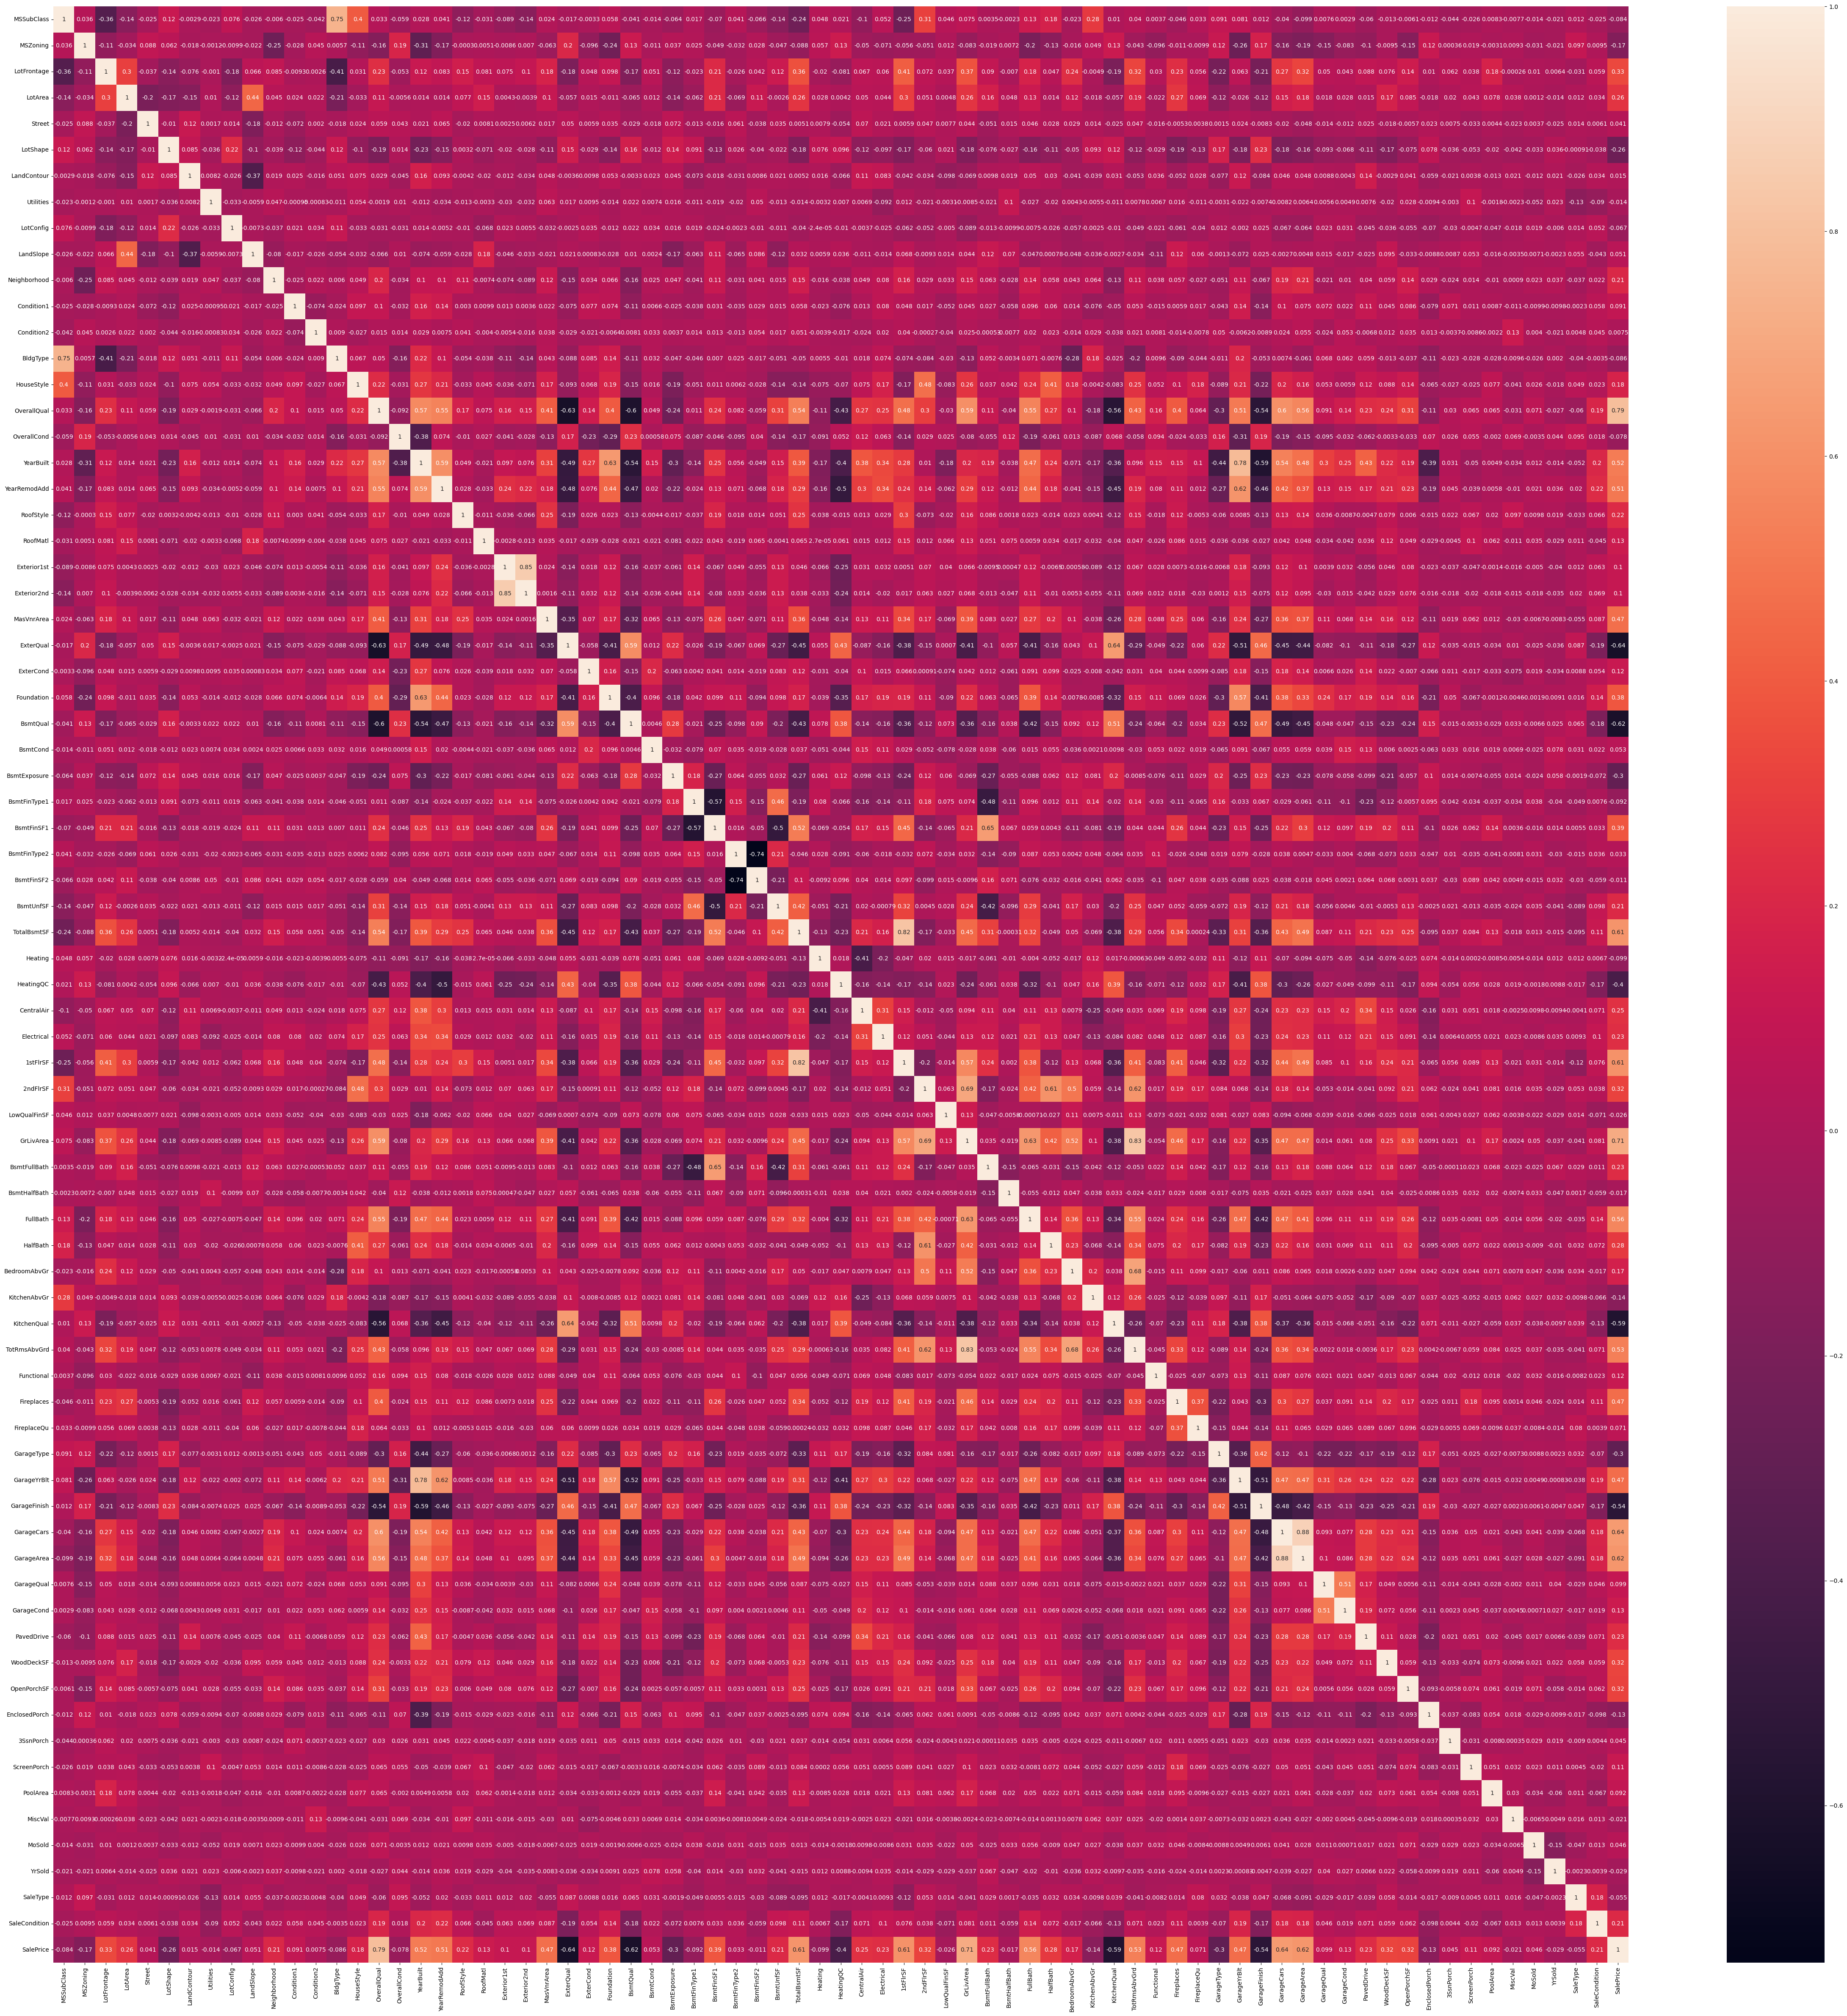

In [75]:
plt.figure(figsize=(60,60))
sns.heatmap(df.corr(numeric_only= True), annot = True)
plt.show()

* There are no features which are corelated with each other that's why i'm not going to drop any feature here.

## PCA


In [79]:
X = pd.DataFrame(x_scaled,columns=x.columns)       # creating new dataframe

In [81]:
from sklearn.decomposition import PCA
pca = PCA()                                           # Initialize PCA
PricipalComponents = pca.fit_transform(X)      # Fit PCA on scaled data and transform it
PricipalComponents

array([[-5.40208481e-01,  5.42835396e-01, -1.64821802e-01, ...,
        -9.77356524e-04,  9.17134293e-17, -5.70143929e-16],
       [-1.92688961e-01, -1.98044709e-01, -4.77643203e-01, ...,
        -7.95774121e-03, -1.44200862e-15,  9.39945535e-16],
       [-8.81418531e-01, -2.38871235e-01,  8.58951659e-02, ...,
         5.74332945e-03,  6.02976871e-16,  2.65379375e-16],
       ...,
       [-2.90322614e-01,  4.69972703e-01, -6.46254324e-02, ...,
        -2.68307008e-04,  1.77787063e-16,  1.25121020e-15],
       [ 5.98998156e-01,  8.13552373e-02, -4.22194630e-01, ...,
        -1.65812108e-02, -1.63463562e-15,  3.40471693e-16],
       [ 1.69081679e-01, -8.38164164e-02, -6.30768886e-01, ...,
         3.41099513e-03,  2.42006552e-16, -1.18508694e-16]])

In [82]:
np.where(np.cumsum(pca.explained_variance_ratio_) <= 0.90)  #find the indices of principal components that together explain up to 90% of the variance.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       dtype=int64),)

In [83]:
pca = PCA(n_components= 32)
new_data = pca.fit_transform(x_scaled)    # Fit PCA on scaled data and transform it
new_data

array([[-0.54020848,  0.5428354 , -0.1648218 , ...,  0.04635953,
         0.15590026, -0.04060914],
       [-0.19268896, -0.19804471, -0.4776432 , ..., -0.26368937,
        -0.20983252,  0.08742148],
       [-0.88141853, -0.23887124,  0.08589517, ..., -0.03133257,
         0.07613913,  0.02319721],
       ...,
       [-0.29032261,  0.4699727 , -0.06462543, ..., -0.05567273,
        -0.10315339,  0.03917268],
       [ 0.59899816,  0.08135524, -0.42219463, ...,  0.29295213,
         0.05761266,  0.09816141],
       [ 0.16908168, -0.08381642, -0.63076889, ...,  0.02710297,
        -0.05530351,  0.07859006]])

In [84]:
col_names = [f'Principal Component {i}' for i in range (1,33)]   # columns name pattern
col_names

['Principal Component 1',
 'Principal Component 2',
 'Principal Component 3',
 'Principal Component 4',
 'Principal Component 5',
 'Principal Component 6',
 'Principal Component 7',
 'Principal Component 8',
 'Principal Component 9',
 'Principal Component 10',
 'Principal Component 11',
 'Principal Component 12',
 'Principal Component 13',
 'Principal Component 14',
 'Principal Component 15',
 'Principal Component 16',
 'Principal Component 17',
 'Principal Component 18',
 'Principal Component 19',
 'Principal Component 20',
 'Principal Component 21',
 'Principal Component 22',
 'Principal Component 23',
 'Principal Component 24',
 'Principal Component 25',
 'Principal Component 26',
 'Principal Component 27',
 'Principal Component 28',
 'Principal Component 29',
 'Principal Component 30',
 'Principal Component 31',
 'Principal Component 32']

In [85]:
#Create DataFrame 

principal_df = pd.DataFrame(data = new_data, columns= col_names)

In [86]:
principal_df          # This will be the new data fed to the algorithm.

Principal Component 1  Principal Component 2  Principal Component 3  \
0                 -0.540208               0.542835              -0.164822   
1                 -0.192689              -0.198045              -0.477643   
2                 -0.881419              -0.238871               0.085895   
3                  0.350060              -0.905557               0.498842   
4                 -1.166442              -0.525313               0.111334   
...                     ...                    ...                    ...   
1455              -0.362447               0.630599               0.235964   
1456               0.368239              -0.208090              -0.683063   
1457              -0.290323               0.469973              -0.064625   
1458               0.598998               0.081355              -0.422195   
1459               0.169082              -0.083816              -0.630769   

      Principal Component 4  Principal Component 5  Principal Component 6  \
0                  0.084291              -0.201917               0.302657   
1                 -0.421083              -0.479870              -0.067053   
2                  0.106047               0.396439               0.229298   
3                  0.161680              -0.229747              -0.503273   
4                  0.135410               0.176172              -0.315820   
...                     ...                    ...                    ...   
1455               0.281743               0.052687               0.395810   
1456              -0.201440              -0.336910               0.652441   
1457               0.151515              -0.304297               0.415532   
1458              -0.599251              -0.170066               0.153198   
1459              -0.143928              -0.199982               0.649779   

      Principal Component 7  Principal Component 8  Principal Component 9  \
0                 -0.206094              -0.330202              -0.055536   
1                  0.184751              -0.319986              -0.276511   
2                 -0.341283              -0.323661              -0.060380   
3                 -0.377115              -0.605622              -0.251452   
4                  0.045804              -0.483693               0.117639   
...                     ...                    ...                    ...   
1455               0.135782              -0.236526              -0.487669   
1456               0.103133              -0.021633               0.480054   
1457              -0.189756              -0.138090               0.485259   
1458              -0.081804               0.168807               0.460528   
1459               0.166254              -0.030804              -0.088498   

      Principal Component 10  ...  Principal Component 23  \
0                   0.289254  ...               -0.065731   
1                  -0.108553  ...                0.175081   
2                   0.318819  ...                0.077430   
3                  -0.245859  ...                0.046301   
4                   0.278163  ...                0.057896   
...                      ...  ...                     ...   
1455                0.481595  ...                0.118447   
1456                0.054342  ...               -0.011944   
1457                0.058404  ...               -0.046283   
1458                0.146602  ...               -0.224580   
1459                0.012430  ...               -0.183612   

      Principal Component 24  Principal Component 25  Principal Component 26  \
0                  -0.049813               -0.051061               -0.099390   
1                   0.145778                0.093233                0.028436   
2                  -0.222226               -0.038510                0.109036   
3                   0.143163                0.196991                0.036230   
4                   0.001418               -0.185359                0.133324   
...               

## Model Selection


In [88]:
# Importing the 'train_test_split' function from scikit-learn's model_selection.

from sklearn.model_selection import train_test_split    

In [89]:
#Split the dataset into training and testing se
# test_size=0.2 → 20% of the data is reserved for testing, and 80% for training
# random_state=69 → you'll get the same split every time you run the code

X_train,X_test,y_train,y_test = train_test_split(principal_df,y,test_size=0.2,random_state=69)

## Linear Regression 

In [91]:
from sklearn.linear_model import LinearRegression  # Importing LinearRegression
lr = LinearRegression()                            # assign in variable 'lr'

In [92]:
lr.fit(X_train,y_train)                           #fit the model

LinearRegression()

In [93]:
from sklearn.metrics import r2_score,mean_squared_error    #import commonly used evaluation metrics from scikit-learn's metrics module

In [95]:
R1 = r2_score(y_test,lr.predict(X_test))                       # calculate r2_score 
R1

0.8501958885072243

In [102]:
mean_squared_error(y_test,lr.predict(X_test))     #calculate mean_squared_error

899069110.4307362

##### Hyperparameter 


In [109]:
from sklearn.model_selection import GridSearchCV    #import GridsearchCV

In [111]:
from sklearn.linear_model import Ridge        # Importing Ridge

In [112]:
ridge=Ridge()                              # assign in variable

In [116]:
# Define the hyperparameter grid for tuning a Ridge Regression model

param = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],          # Alpha controls the regularization strength.
    'fit_intercept': [True, False],                       # Whether or not to calculate the intercept in the model.
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']  # Different solver algorithms used to fit the Ridge Regression model.
}

In [118]:
# Create a GridSearchCV object to perform hyperparameter tuning for Ridge Regression

lr1 = GridSearchCV(estimator= Ridge(),     # The model to be tuned: Ridge Regression
                   param_grid= param,       # Dictionary of hyperparameters to try
                   cv=3,                   # 3-fold cross-validation 
                   verbose=3,             # Prints detailed logs for each step
                   n_jobs=1,               # Number of CPU cores to use
                   scoring='r2',           # Evaluation metric: r2_score 
                   refit=True)             # After finding the best parameters, refit the model on the entire dataset

In [120]:
lr1.fit(X_train, y_train)                 # Fit the GridSearchCV object to the training dat

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END alpha=0.01, fit_intercept=True, solver=auto;, score=0.790 total time=   0.0s
[CV 2/3] END alpha=0.01, fit_intercept=True, solver=auto;, score=0.769 total time=   0.0s
[CV 3/3] END alpha=0.01, fit_intercept=True, solver=auto;, score=0.799 total time=   0.0s
[CV 1/3] END alpha=0.01, fit_intercept=True, solver=svd;, score=0.790 total time=   0.0s
[CV 2/3] END alpha=0.01, fit_intercept=True, solver=svd;, score=0.769 total time=   0.0s
[CV 3/3] END alpha=0.01, fit_intercept=True, solver=svd;, score=0.799 total time=   0.0s
[CV 1/3] END alpha=0.01, fit_intercept=True, solver=cholesky;, score=0.790 total time=   0.0s
[CV 2/3] END alpha=0.01, fit_intercept=True, solver=cholesky;, score=0.769 total time=   0.0s
[CV 3/3] END alpha=0.01, fit_intercept=True, solver=cholesky;, score=0.799 total time=   0.0s
[CV 1/3] END alpha=0.01, fit_intercept=True, solver=lsqr;, score=0.790 total time=   0.0s
[CV 2/3] END alpha=0.01, fit_

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']},
             scoring='r2', verbose=3)

In [121]:
lr2 = Ridge(solver='lsqr')
lr2.fit(X_train, y_train)

Ridge(solver='lsqr')

In [122]:
y_pred = lr1.predict(X_test)    # Use the best estimator to predict target values for the test data

In [126]:
H1 = r2_score(y_test, y_pred)       # Calculate the R² score to evaluate how well the model's predictions match the actual test values
H1

0.8499872002599467

## Random Forest


In [129]:
from sklearn.ensemble import RandomForestRegressor    # Import the RandomForestRegressor class from sklearn.ensemble
rd = RandomForestRegressor(random_state= 99)          # Create an instance of the RandomForestRegressor

In [130]:
rd.fit(X_train,y_train)                              #fit the model

RandomForestRegressor(random_state=99)

In [131]:
R2 = r2_score(y_test,rd.predict(X_test))                 # calculate r2_score 
R2

0.8068130449504636

##### Hyperparameter 

In [134]:
# Define the hyperparameter grid for RandomForestRegressor tuning

paramsrd = {
    'n_estimators': [100, 200, 500],                # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],            # Maximum depth of each tree. 
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                 # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],      # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                     # Whether bootstrap samples are used when building trees
}

In [135]:
rd1 = GridSearchCV(estimator= RandomForestRegressor(), # The model to be tuned: RandomForest Regressor
                   param_grid= paramsrd,       # Dictionary of hyperparameters to try
                   cv=3,                   # 3-fold cross-validation 
                   verbose=3,             # Prints detailed logs for each step
                   n_jobs=1,               # Number of CPU cores to use
                   scoring='r2',           # Evaluation metric: r2_score 
                   refit=True)             # After finding the best parameters, refit the model on the entire dataset
                  

In [140]:
rd1.fit(X_train, y_train)                       # Fit the GridSearchCV object to the training data

Fitting 3 folds for each of 810 candidates, totalling 2430 fits
[CV 1/3] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END boots

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='r2', verbose=3)

In [157]:
y_pred = rd1.predict(X_test)                     #predict the model

In [159]:
H2= r2_score(y_test, y_pred)                      #calculate r2_sore 
H2

0.764776734654577

## Bagging Regressor


In [163]:
from sklearn.ensemble import BaggingRegressor   # Import the BaggingRegressor class from sklearn.ensemble

In [165]:
bg = BaggingRegressor(random_state= 30)         # Create an instance of the BaggingRegressor

In [167]:
bg.fit(X_train, y_train)                       # fit the model 

BaggingRegressor(random_state=30)

In [168]:
y_pred = bg.predict(X_test)                # predicting 

In [171]:
R3= r2_score(y_test, y_pred)                  # calculate r2_score 
R3

0.775145492422755

#### HyperParameter 


In [173]:
from sklearn.model_selection import GridSearchCV

In [177]:
paramsbg = {
    'n_estimators': [100],     # Number of trees 
    'max_samples': [0.5],       # Maximum number of samples
    'max_features': [0.8],          # max features 
    'bootstrap': [True, False],
    'bootstrap_features': [False, True]
}

In [179]:
bg1 =  GridSearchCV(estimator= BaggingRegressor(),   # The model to be tuned BaggingRegressor
                   param_grid= paramsbg,       # Dictionary of hyperparameters to try
                   cv=3,                   # 3-fold cross-validation 
                   verbose=3,             # Prints detailed logs for each step
                   n_jobs=1,               # Number of CPU cores to use
                   scoring='r2',           # Evaluation metric: r2_score 
                   refit=True)             # After finding the best parameters, refit the model on the entire dataset

In [181]:
bg1.fit(X_train, y_train)      # Fit the GridSearchCV object to the training data

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=100;, score=0.705 total time=   2.1s
[CV 2/3] END bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=100;, score=0.736 total time=   2.0s
[CV 3/3] END bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=100;, score=0.711 total time=   1.9s
[CV 1/3] END bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=100;, score=0.625 total time=   2.0s
[CV 2/3] END bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=100;, score=0.675 total time=   2.1s
[CV 3/3] END bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=100;, score=0.612 total time=   2.1s
[CV 1/3] END bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators

GridSearchCV(cv=3, estimator=BaggingRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [False, True],
                         'max_features': [0.8], 'max_samples': [0.5],
                         'n_estimators': [100]},
             scoring='r2', verbose=3)

In [195]:
y_pred= bg1.predict(X_test)     # predict the model 

In [197]:
H3= r2_score(y_test, y_pred)      # finding r2_score 
H3

0.7846970167390966

## Gradient Boosting Regressor


In [200]:
from sklearn.ensemble import GradientBoostingRegressor       # Import the GradientBoostingRegressor class from sklearn.ensemble

In [202]:
gb = GradientBoostingRegressor(random_state=42)           # Create an instance of the BaggingRegressor

In [204]:
gb.fit(X_train,y_train)                                  # fit the model 

GradientBoostingRegressor(random_state=42)

In [205]:
R4 = r2_score(y_test,gb.predict(X_test))               #calculate r2_score 
R4

0.8159840746046239

##### Hyperpameter 


In [218]:
paramsgb = {
    'n_estimators': [100],                 # no.of trees 
    'learning_rate': [0.05],              # Controls the contribution of each tree. 
    'max_depth': [3],                          # maximum depth of the tree
    'min_samples_split': [2,10],                 # minimum sample split
    'min_samples_leaf': [4],                   # minimum sample leaf 
    'subsample': [0.6,1.0],
    'max_features': ['sqrt', 'log2'],       # features used 
    'loss': ['squared_error', 'absolute_error']     # errors 
}

In [220]:
gb1 = GridSearchCV(estimator= GradientBoostingRegressor(),   # The base model to tune : GradientBoostingRegressor
                   param_grid= paramsgb,              # Dictionary of hyperparameters to try
                   cv =3,                                      # 3-fold cross-validation
                   scoring= 'f1',                              # Use F1-score as the performance metric
                   n_jobs=1,                                   # Number of CPU cores to use
                   verbose=3,                                  # Controls the amount of output
                   refit=True)                                 # After finding the best params, refit model on entire training data

In [222]:
gb1.fit(X_train, y_train)     # Fit the GridSearchCV object to training data 

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END learning_rate=0.05, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.6;, score=nan total time=   0.2s
[CV 2/3] END learning_rate=0.05, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.6;, score=nan total time=   0.3s
[CV 3/3] END learning_rate=0.05, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.6;, score=nan total time=   0.2s
[CV 1/3] END learning_rate=0.05, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=1.0;, score=nan total time=   0.3s
[CV 2/3] END learning_rate=0.05, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=1.0;, score=nan total time=  

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.05],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [3], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [4], 'min_samples_split': [2, 10],
                         'n_estimators': [100], 'subsample': [0.6, 1.0]},
             scoring='f1', verbose=3)

In [224]:
y_pred= gb1.predict(X_test)    #predicgting after applying hyperparameter tuning

In [226]:
H4 = r2_score(y_test, y_pred)    #r2_score after applying hyperparameter tuning
H4

0.7718359133124365

## Decision Tree


In [229]:
from sklearn.tree import DecisionTreeRegressor     # Import the DecisionTreeRegressor class from sklearn.tree

In [231]:
dt = DecisionTreeRegressor(random_state= 30)    # Create an instance of the DecisionTreeRegressor

In [233]:
dt.fit(X_train,y_train)                         # fit the model 

DecisionTreeRegressor(random_state=30)

In [235]:
R5 = r2_score(y_test,dt.predict(X_test))              #calculate r2_score 
R5

0.5367613965383461

## XGBRegressor


In [238]:
from xgboost import XGBRegressor    # import the XGBRegressor from the XGBoost library 
xgb = XGBRegressor()               # Create an instance of the  XGBRegressor

In [239]:
xgb.fit(X_train,y_train)                 # fit the model 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [241]:
R6 = r2_score(y_test,xgb.predict(X_test))      #calculate r2_score 
R6

0.8050916194915771

##### Hyperparameter 


In [257]:
paramsxgb = {
    'n_estimators': [100],         # number of boosting rounds
    'learning_rate': [0.01,0.1],     # Controls the contribution of each tree.
    'max_depth': [3,10],             # maximum depth of the tree
    'min_child_weight': [1,5],           # Minimum sum of instance weight in a child.
    'gamma': [0, 0.1,0.5],            # Minimum loss reduction required to make a split.
    'subsample': [0.6,1.0],           # Fraction of samples to be randomly selected for each tree.
    'colsample_bytree': [0.6,1.0],    # Fraction of features (columns) to be randomly selected per tree.
    'reg_alpha': [0, 0.01, 0.1],             # L1 regularization term on weights.
    'reg_lambda': [0.5,1.5],           
    'booster': ['gbtree']
}

In [261]:
xgb1 = GridSearchCV(estimator= XGBRegressor(),              # The base model to tune : XGBRegressor
                   param_grid= paramsxgb,              # Dictionary of hyperparameters to try
                   cv =3,                                      # 3-fold cross-validation
                   scoring= 'f1',                              # Use F1-score as the performance metric
                   n_jobs=1,                                   # Number of CPU cores to use
                   verbose=3,                                  # Controls the amount of output
                   refit=True)                                 # After finding the best params, refit model on entire training data
                   

In [263]:
xgb1.fit(X_train, y_train)                  # fit the model 

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV 1/3] END booster=gbtree, colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.6;, score=nan total time=   0.1s
[CV 2/3] END booster=gbtree, colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.6;, score=nan total time=   0.0s
[CV 3/3] END booster=gbtree, colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.6;, score=nan total time=   0.1s
[CV 1/3] END booster=gbtree, colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=1.0;, score=nan total time=   0.0s
[CV 2/3] END booster=gbtree, colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_e

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.6, 1.0],
                         'gamma': [0, 0.1, 0.5], 'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 10], 'min_child_weight': [1, 5],
                         'n_estimators': [100], 'reg_alpha': [0, 0.01, 0.1],
                         'reg_lambda': [0.5, 1.5], 'subsample': [0.6, 1.0]},
             scoring='f1', verbose=3)

In [266]:
y_pred = xgb1.predict(X_test)             #predict the model 

In [267]:
H6= r2_score(y_test, y_pred)                 # calculate r2_score 
H6

0.5212273001670837

## AdaBoost


In [269]:
from sklearn.ensemble import AdaBoostRegressor      # Import the AdaBoostRegressor class from sklearn.ensemble

In [270]:
ada = AdaBoostRegressor(random_state= 99)          # Create an instance of the AdaBoostRegressor

In [271]:
ada.fit(X_train, y_train)                         #fit the model 

AdaBoostRegressor(random_state=99)

In [272]:
y_pred = ada.predict(X_test)     #predict the testing data

In [273]:
R7 = r2_score (y_test, y_pred)       #create r2_score 
R7

0.7004935264242445

## Model Comparision Report 
* Comparing r2_score and after applying HyperParameter r2_score of all the model.

In [290]:
score = pd.DataFrame({"Model" : ["Linear Regression", 'RandomForest Regressor', 'Bagging Regressor', 'GradientBoosting Regressor', 'DecisionTree Regressor', 'XGBRegressor', 'AdaBoost Regressor'],
                      "R2_Score": [R1*100, R2*100, R3*100, R4*100, R5*100, R6*100, R7*100],
                      "With HyperParamter Tuning": [H1*100,H2*100,H3*100,H4*100,'Not Performed',H6*100, 'Not Performed']
                      })

In [292]:
score 

Model   R2_Score With HyperParamter Tuning
0           Linear Regression  85.019589                  84.99872
1      RandomForest Regressor  80.681304                 76.477673
2           Bagging Regressor  77.514549                 78.469702
3  GradientBoosting Regressor  81.598407                 77.183591
4      DecisionTree Regressor  53.676140             Not Performed
5                XGBRegressor  80.509162                  52.12273
6          AdaBoost Regressor  70.049353             Not Performed

## Conclusion of Model Comparision Report 
* I have used 7 Algorithms which are LinearRegression, RandomForestRegressor, Bagging Regressor, GradientBoosting Regressor, DecisionTree Regressor, XGBRegressor, AdaBoost Regressor for training the model. I got **85.01 percentage in Linear Regression without Hyperparameter**tuning which is maximum than all other algorithms and **84.99 percentage in Linear Regression with hyperparamter** tuning. So i am preferring Linear Regression without hyperparameter tuning.

## Challenges faced 
Throughout the course of this project, several challenges were encountered and successfully addressed. These challenges can be categorized into three main areas: Feature Selection, Gaining Insights, and Model Selection.
1. **Feature Selection** : There are so many features which shows very less variance, so they are dropped from the dataset.
2. **Data Preprocessing** : There are many missing values and object datatypes that are further converted to categorical dtype.
3. **Model Selection** : The R2_Score of the model is not increasing, so i have to perform hyperparameter in almost all the algorithms. 